In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

I0000 00:00:1761854604.279560    4739 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1761854604.316882    4739 cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1761854605.021431    4739 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from keras import backend as K
print(K.backend())

tensorflow


In [3]:
# Create the model
inputs = keras.Input(shape=(784,))
x = layers.Dense(256, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

W0000 00:00:1761854605.893951    4739 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1761854605.898163    4739 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1761854606.009981    4739 gpu_device.cc:2040] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12741 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 5070 Ti, pci bus id: 0000:01:00.0, compute capability: 12.0a


In [4]:
model.summary()


Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [6]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [7]:
epochs = 10
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_split=0.2)


Epoch 1/10


I0000 00:00:1761854609.360973    4870 service.cc:158] XLA service 0x78ffa8031720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761854609.361009    4870 service.cc:166]   StreamExecutor device (0): NVIDIA GeForce RTX 5070 Ti, Compute Capability 12.0a
I0000 00:00:1761854609.369099    4870 dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1761854609.410104    4870 cuda_dnn.cc:463] Loaded cuDNN version 91002
I0000 00:00:1761854609.608013    5014 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_10', 8 bytes spill stores, 8 bytes spill loads



 97/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6860 - loss: 1.1097

I0000 00:00:1761854610.244944    4870 device_compiler.h:208] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9197 - loss: 0.2825 - val_accuracy: 0.9557 - val_loss: 0.1497
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9657 - loss: 0.1185 - val_accuracy: 0.9663 - val_loss: 0.1127
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9766 - loss: 0.0799 - val_accuracy: 0.9678 - val_loss: 0.1055
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9836 - loss: 0.0570 - val_accuracy: 0.9732 - val_loss: 0.0906
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9875 - loss: 0.0435 - val_accuracy: 0.9746 - val_loss: 0.0838
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9903 - loss: 0.0328 - val_accuracy: 0.9747 - val_loss: 0.0855
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9921 - loss: 0.0266 - val_accuracy: 0.9774 - val_loss: 0.0807
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9946 - loss: 0.0197 - val_accuracy: 0.9774 - val_

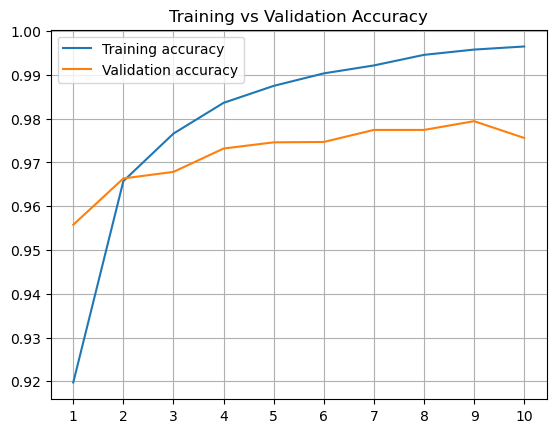

In [8]:
plt.title("Training vs Validation Accuracy")
plt.plot(np.arange(1, len(history.history["accuracy"]) + 1), history.history["accuracy"], label="Training accuracy")
plt.plot(np.arange(1, len(history.history["val_accuracy"]) + 1), history.history["val_accuracy"], label="Validation accuracy")
plt.xticks(np.arange(1, epochs+1, 1))
plt.yticks()
plt.legend()
plt.grid()
plt.show()

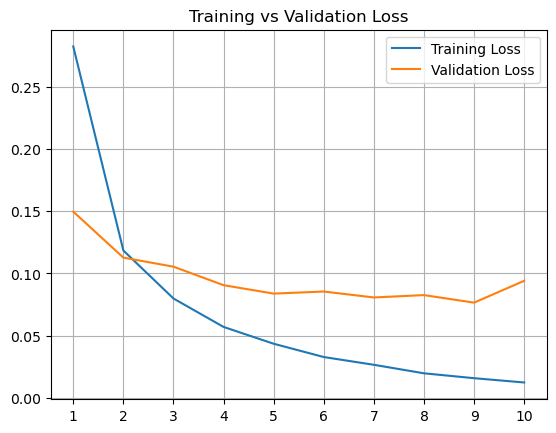

In [9]:
plt.title("Training vs Validation Loss")
plt.plot(np.arange(1, len(history.history["loss"]) + 1), history.history["loss"], label="Training Loss")
plt.plot(np.arange(1, len(history.history["val_loss"]) + 1), history.history["val_loss"], label="Validation Loss")
plt.xticks(np.arange(1, epochs + 1, 1))
plt.legend()
plt.grid()
plt.show()


In [10]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - 3ms/step - accuracy: 0.9783 - loss: 0.0792
Test loss: 0.07917384803295135
Test accuracy: 0.9782999753952026


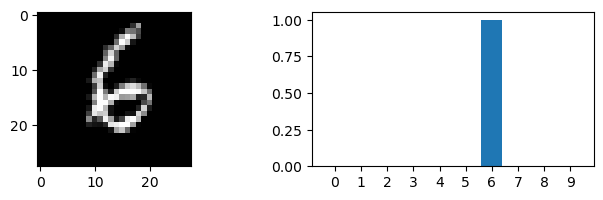

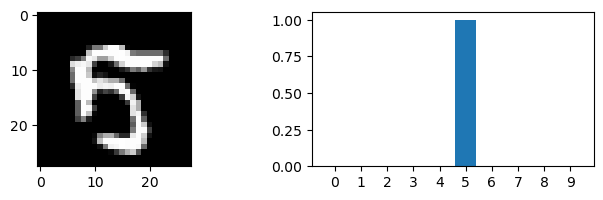

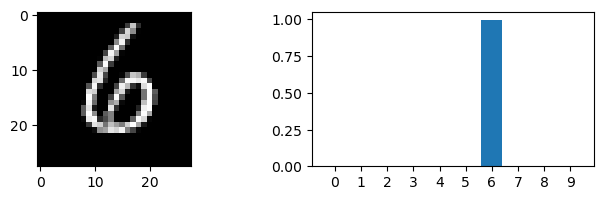

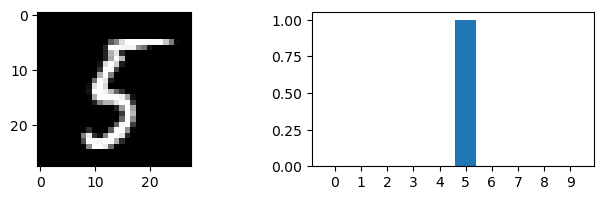

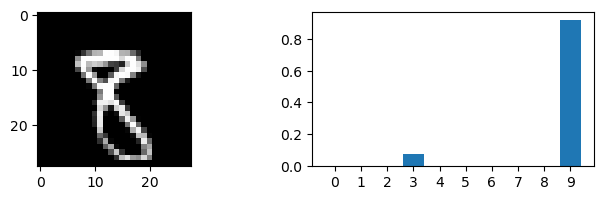

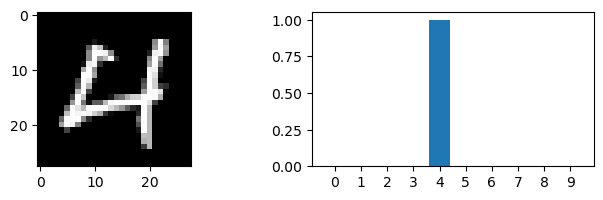

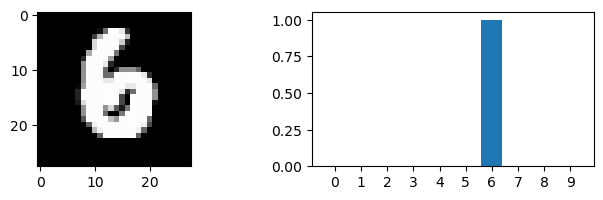

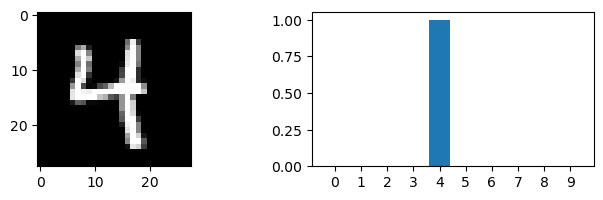

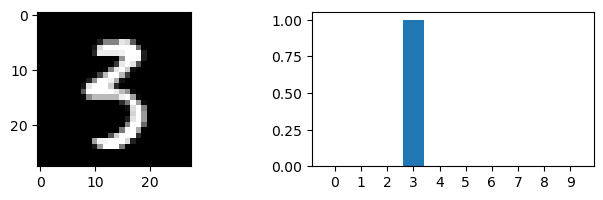

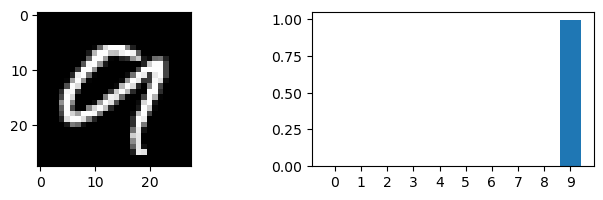

In [11]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 2))
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((28, 28)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.bar(ind, y[start+k].numpy().flatten())
    plt.xticks(range(10))